<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Continuous_Median_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a `ContinuousMedianHandler` class that supports:

- The continuous insertion of numbers with the `insert` method.
- The instant (O(1) time) retrieval of the median of the numbers that have been inserted thus far with the `getMedian` method.

The `getMedian` method has already been written for you. You simply have to write the `insert` method.

The median of a set of numbers is the "middle" number when the numbers are ordered from smallest to greatest. If there's an odd number of numbers in the set, as in `{1, 3, 7}`, the median is the number in the middle (`3` in this case); if there's an even number of numbers in the set, as in `{1, 3, 7, 8}`, the median is the average of the two middle numbers (`(3 + 7) / 2 == 5` in this case).

Sample Usage

```
// All operations below are performed sequentially.
ContinuousMedianHandler(): - // instantiate a ContinuousMedianHandler
insert(5): -
insert(10): -
getMedian(): 7.5
insert(100): -
getMedian(): 10
```



# Solution

In [1]:
# Do not edit the class below except for
# the insert method. Feel free to add new
# properties and methods to the class.
class ContinuousMedianHandler:
  def __init__(self):
    self.lowers = Heap(max_heap_func, [])
    self.greaters = Heap(min_heap_func, [])
    self.median = None
  
  # Time O(log n)
  # Space O(n)
  def insert(self, number):
    if self.lowers.length == 0 or number < self.lowers.peek():
      self.lowers.insert(number)
    else:
      self.greaters.insert(number)
    self.rebalance_heaps()
    self.update_median()

  def rebalance_heaps(self):
    if self.lowers.length - self.greaters.length == 2:
      self.greaters.inert(self.lowers.remove())
    elif self.greaters.length - self.lowers.length == 2:
      self.lowers.insert(self.greaters.remove())

  def update_median(self):
    if self.lowers.length == self.greaters.length:
      self.median = (self.lowers.peek() + self.greaters.peek()) / 2
    elif self.lowers.length > self.greaters.length:
      self.median = self.lowers.peek()
    else:
      self.median = self.greaters.peek()
      
  def getMedian(self):
    return self.median

class Heap:
  def __init__(self, comparison_func, array):
    self.comparison_func = comparison_func
    self.heap = self.build_heap(array)
    self.length = len(self.heap)
  
  def build_heap(self, array):
    last_parent_idx = (len(array) - 2) // 2
    for current_idx in reversed(range(last_parent_idx + 1)):
      self.sift_down(current_idx, len(array) - 1, array)
    return array

  def sift_down(self, current_idx, end_idx, heap):
    child_one_idx = current_idx * 2 + 1
    while child_one_idx <= end_idx:
      child_two_idx = current_idx * 2 + 2
      if child_two_idx <= end_idx and self.comparison_func(heap[child_two_idx], heap[child_one_idx]):
        idx_to_swap = child_two_idx
      else:
        idx_to_swap = child_one_idx
      if self.comparison_func(heap[idx_to_swap], heap[current_idx]):
        self.swap(current_idx, idx_to_swap, heap)
        current_idx = idx_to_swap
        child_one_idx = current_idx * 2 + 1
      else:
        return

  def sift_up(self, current_idx, heap):
    parent_idx = (current_idx - 1) // 2
    while current_idx > 0:
      if self.comparison_func(heap[current_idx], heap[parent_idx]):
        self.swap(current_idx, parent_idx, heap)
        current_idx = parent_idx
        parent_idx = (current_idx - 1)//2
      else:
        return

  def peek(self):
    return self.heap[0]
  
  def remove(self):
    self.swap(0, self.length - 1, self.heap)
    value_to_remove = self.heap.pop()
    self.length -= 1
    self.sift_down(0, self.length - 1, self.heap)
    return value_to_remove

  def insert(self, value):
    self.heap.append(value)
    self.length += 1
    self.sift_up(self.length - 1, self.heap)

  def swap(self, i, j, array):
    array[i], array[j] = array[j], array[i]
          

def max_heap_func(a, b):
  return a > b

def min_heap_func(a, b):
  return a < b


# Test

In [18]:
def moving_median(num_list):
  cont_median = ContinuousMedianHandler()
  for i in range(len(num_list)):
    print(num_list[i], end = '')
    if i <= len(num_list) - 2:
      print(' -> ', end = '')
  print('')

  for i in range(len(num_list)):
    cont_median.insert(num_list[i])
    print(cont_median.getMedian(), end = '')
    if i <= len(num_list) - 2:
      print(' -> ', end = '')
  print('')

In [21]:
# num = 5, 10, 100, 200, 6, 13, 14
# moving P50 = 5, 7.5, 10, 55.0, 10, 11.5, 13

num_list = [5, 10, 100, 200, 6, 13, 14]
moving_median(num_list)

5 -> 10 -> 100 -> 200 -> 6 -> 13 -> 14
5 -> 7.5 -> 10 -> 55.0 -> 10 -> 11.5 -> 13


# Conceptual Note

- Separate element to lower half and greater half.
- implement those as max/min heap respectively
- P50 will be sth. between their root.
- thus, we can insert with in O(log(n)) Time

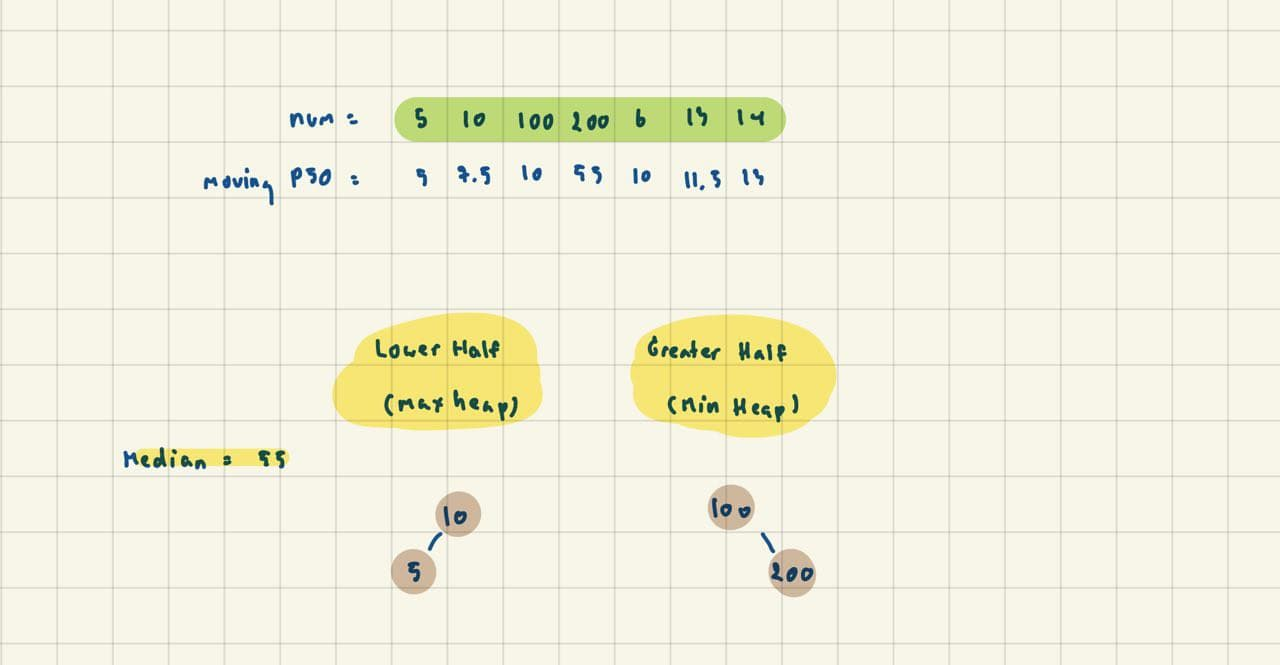